# Import Libraries

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
# Import the necessary packages
import numpy as np
import pandas as pd
import datetime
import math

# Visualition
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning and preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Data spliting
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Model evaluation
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Load Data

In [83]:
# Load the dataset from the csv file using pandas
data = pd.read_csv("/content/drive/MyDrive/dataset/fraud.csv")

data.head()

,Unnamed: 0.1,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [84]:
# Number of rows and columns
data.shape

(1852394, 24)

In [85]:
# Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0.1           int64  
 1   Unnamed: 0             int64  
 2   trans_date_trans_time  object 
 3   cc_num                 int64  
 4   merchant               object 
 5   category               object 
 6   amt                    float64
 7   first                  object 
 8   last                   object 
 9   gender                 object 
 10  street                 object 
 11  city                   object 
 12  state                  object 
 13  zip                    int64  
 14  lat                    float64
 15  long                   float64
 16  city_pop               int64  
 17  job                    object 
 18  dob                    object 
 19  trans_num              object 
 20  unix_time              int64  
 21  merch_lat              float64
 22  merch_long        

In [86]:
# Summary statistics
data.describe()


,Unnamed: 0.1,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [87]:
# Columns information
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'trans_date_trans_time', 'cc_num',
       'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# Data Cleaning

In [88]:
# Check for null values
data.isnull().sum()

Unnamed: 0.1             0
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [89]:
# Identify duplicates
data.duplicated().sum()

0

In [90]:
# Convert 'trans_date_trans_time' to datetime and extract useful features
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day'] = data['trans_date_trans_time'].dt.day
data['month'] = data['trans_date_trans_time'].dt.month
data['weekday'] = data['trans_date_trans_time'].dt.weekday

In [91]:
# Remove the prefix "fraud_" from the "merchant" column
data["merchant"] = data["merchant"].str.replace("fraud_", "")

# Exploratory Data Analysis

In [92]:
# Determine number of fraud cases in dataset
fraudulent_transactions = data[data['is_fraud'] == 1]
regular_transactions = data[data['is_fraud'] == 0]


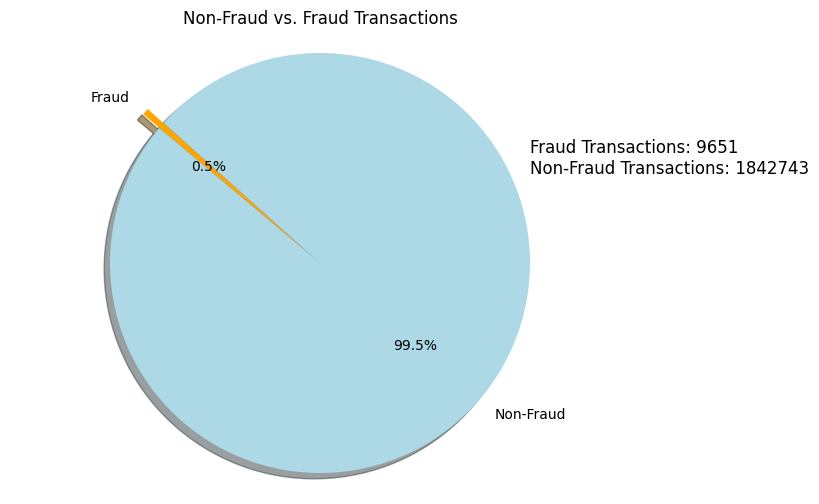

In [93]:
fraud_count = len(fraudulent_transactions)
regular_count = len(regular_transactions)

# Total transaction count
total_transactions = len(data)

regular_percentage = (regular_count / total_transactions) * 100
fraud_percentage = (fraud_count / total_transactions) * 100

# Data for the pie chart
labels = ['Non-Fraud', 'Fraud']
sizes = [regular_percentage, fraud_percentage]
colors = ['lightblue', 'orange']
explode = (0, 0.1)  # Explode the 'Fraud' slice for emphasis

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Non-Fraud vs. Fraud Transactions')
plt.axis('equal')
plt.text(1, 0.5, f'Fraud Transactions: {fraud_count}\nNon-Fraud Transactions: {regular_count}', fontsize=12, verticalalignment='center')

plt.show()

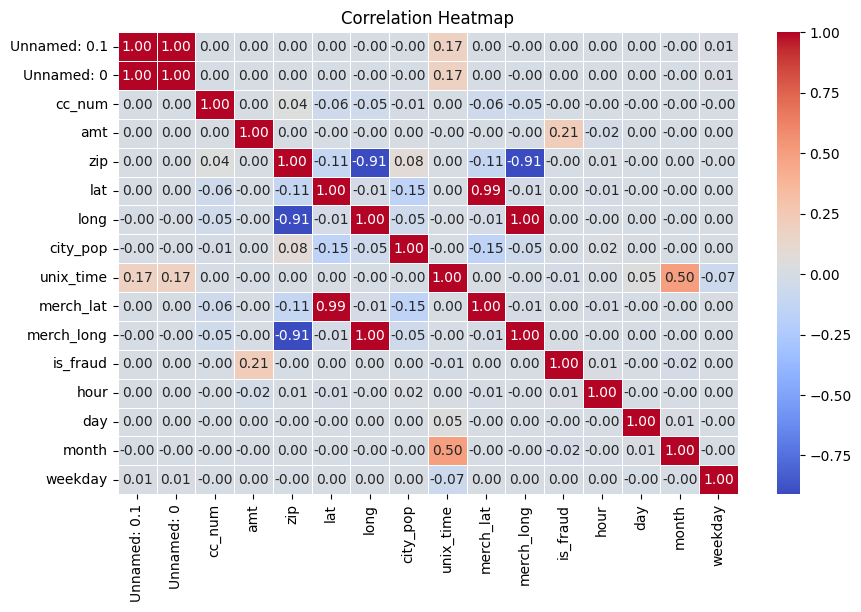

In [94]:
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

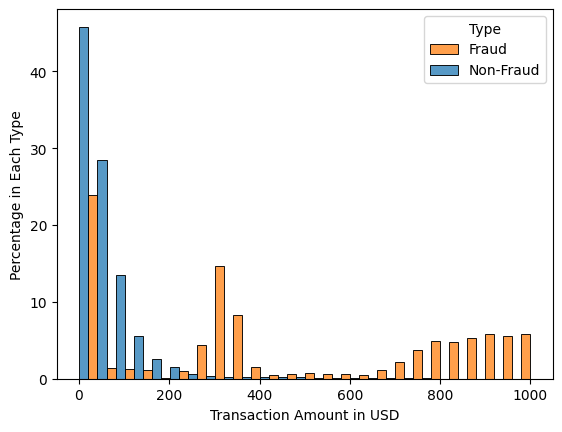

In [95]:
ax=sns.histplot(x='amt',data=data[data.amt<=1000], hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Non-Fraud'])

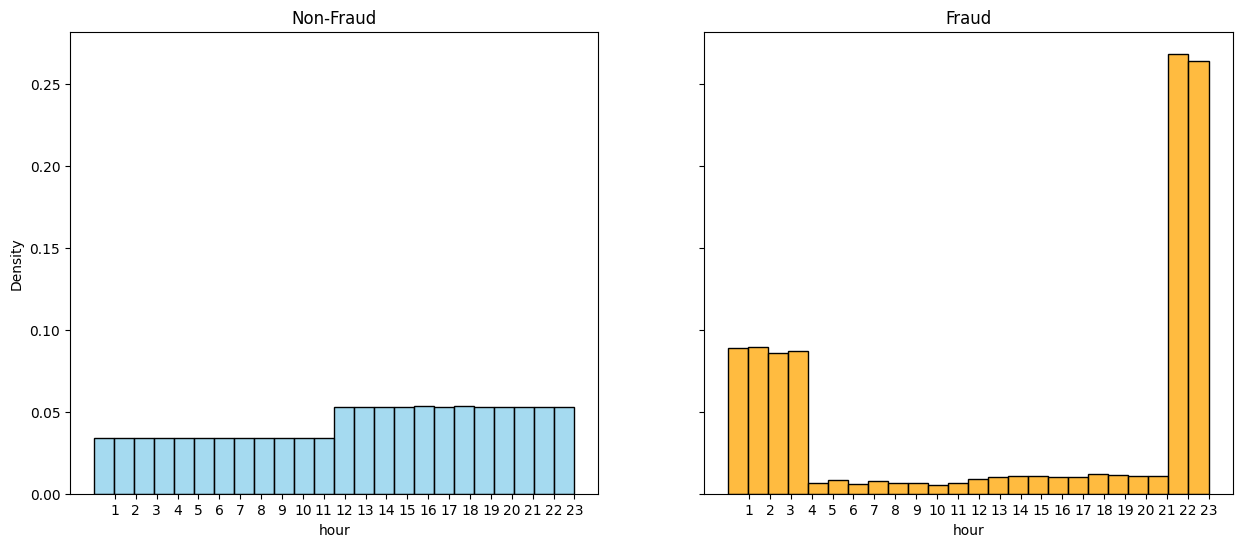

In [96]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='hour', data=data[data["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1, color="skyblue")
ax2 = sns.histplot(x='hour', data=data[data["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="orange")
ax1.set_title("Non-Fraud")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 24))
ax2.set_xticks(np.arange(1, 24));

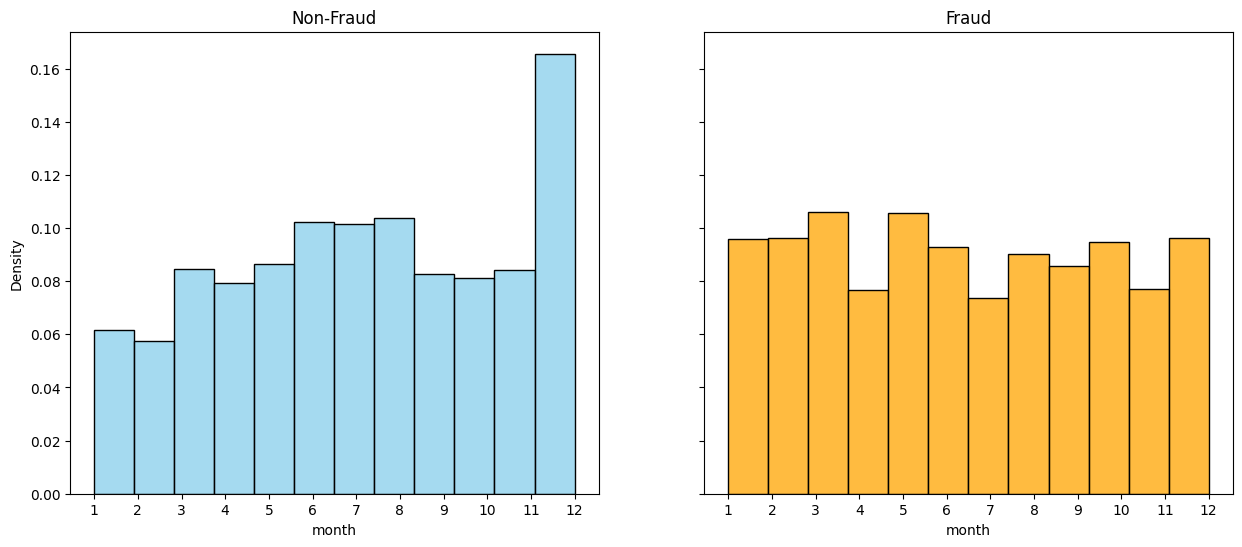

In [97]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='month', data=data[data["is_fraud"] == 0],
                   stat="density", bins=12, ax=ax1, color="skyblue")
ax2 = sns.histplot(x='month', data=data[data["is_fraud"] == 1],
                   stat="density", bins=12, ax=ax2, color="orange")
ax1.set_title("Non-Fraud")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 13))
ax2.set_xticks(np.arange(1, 13));

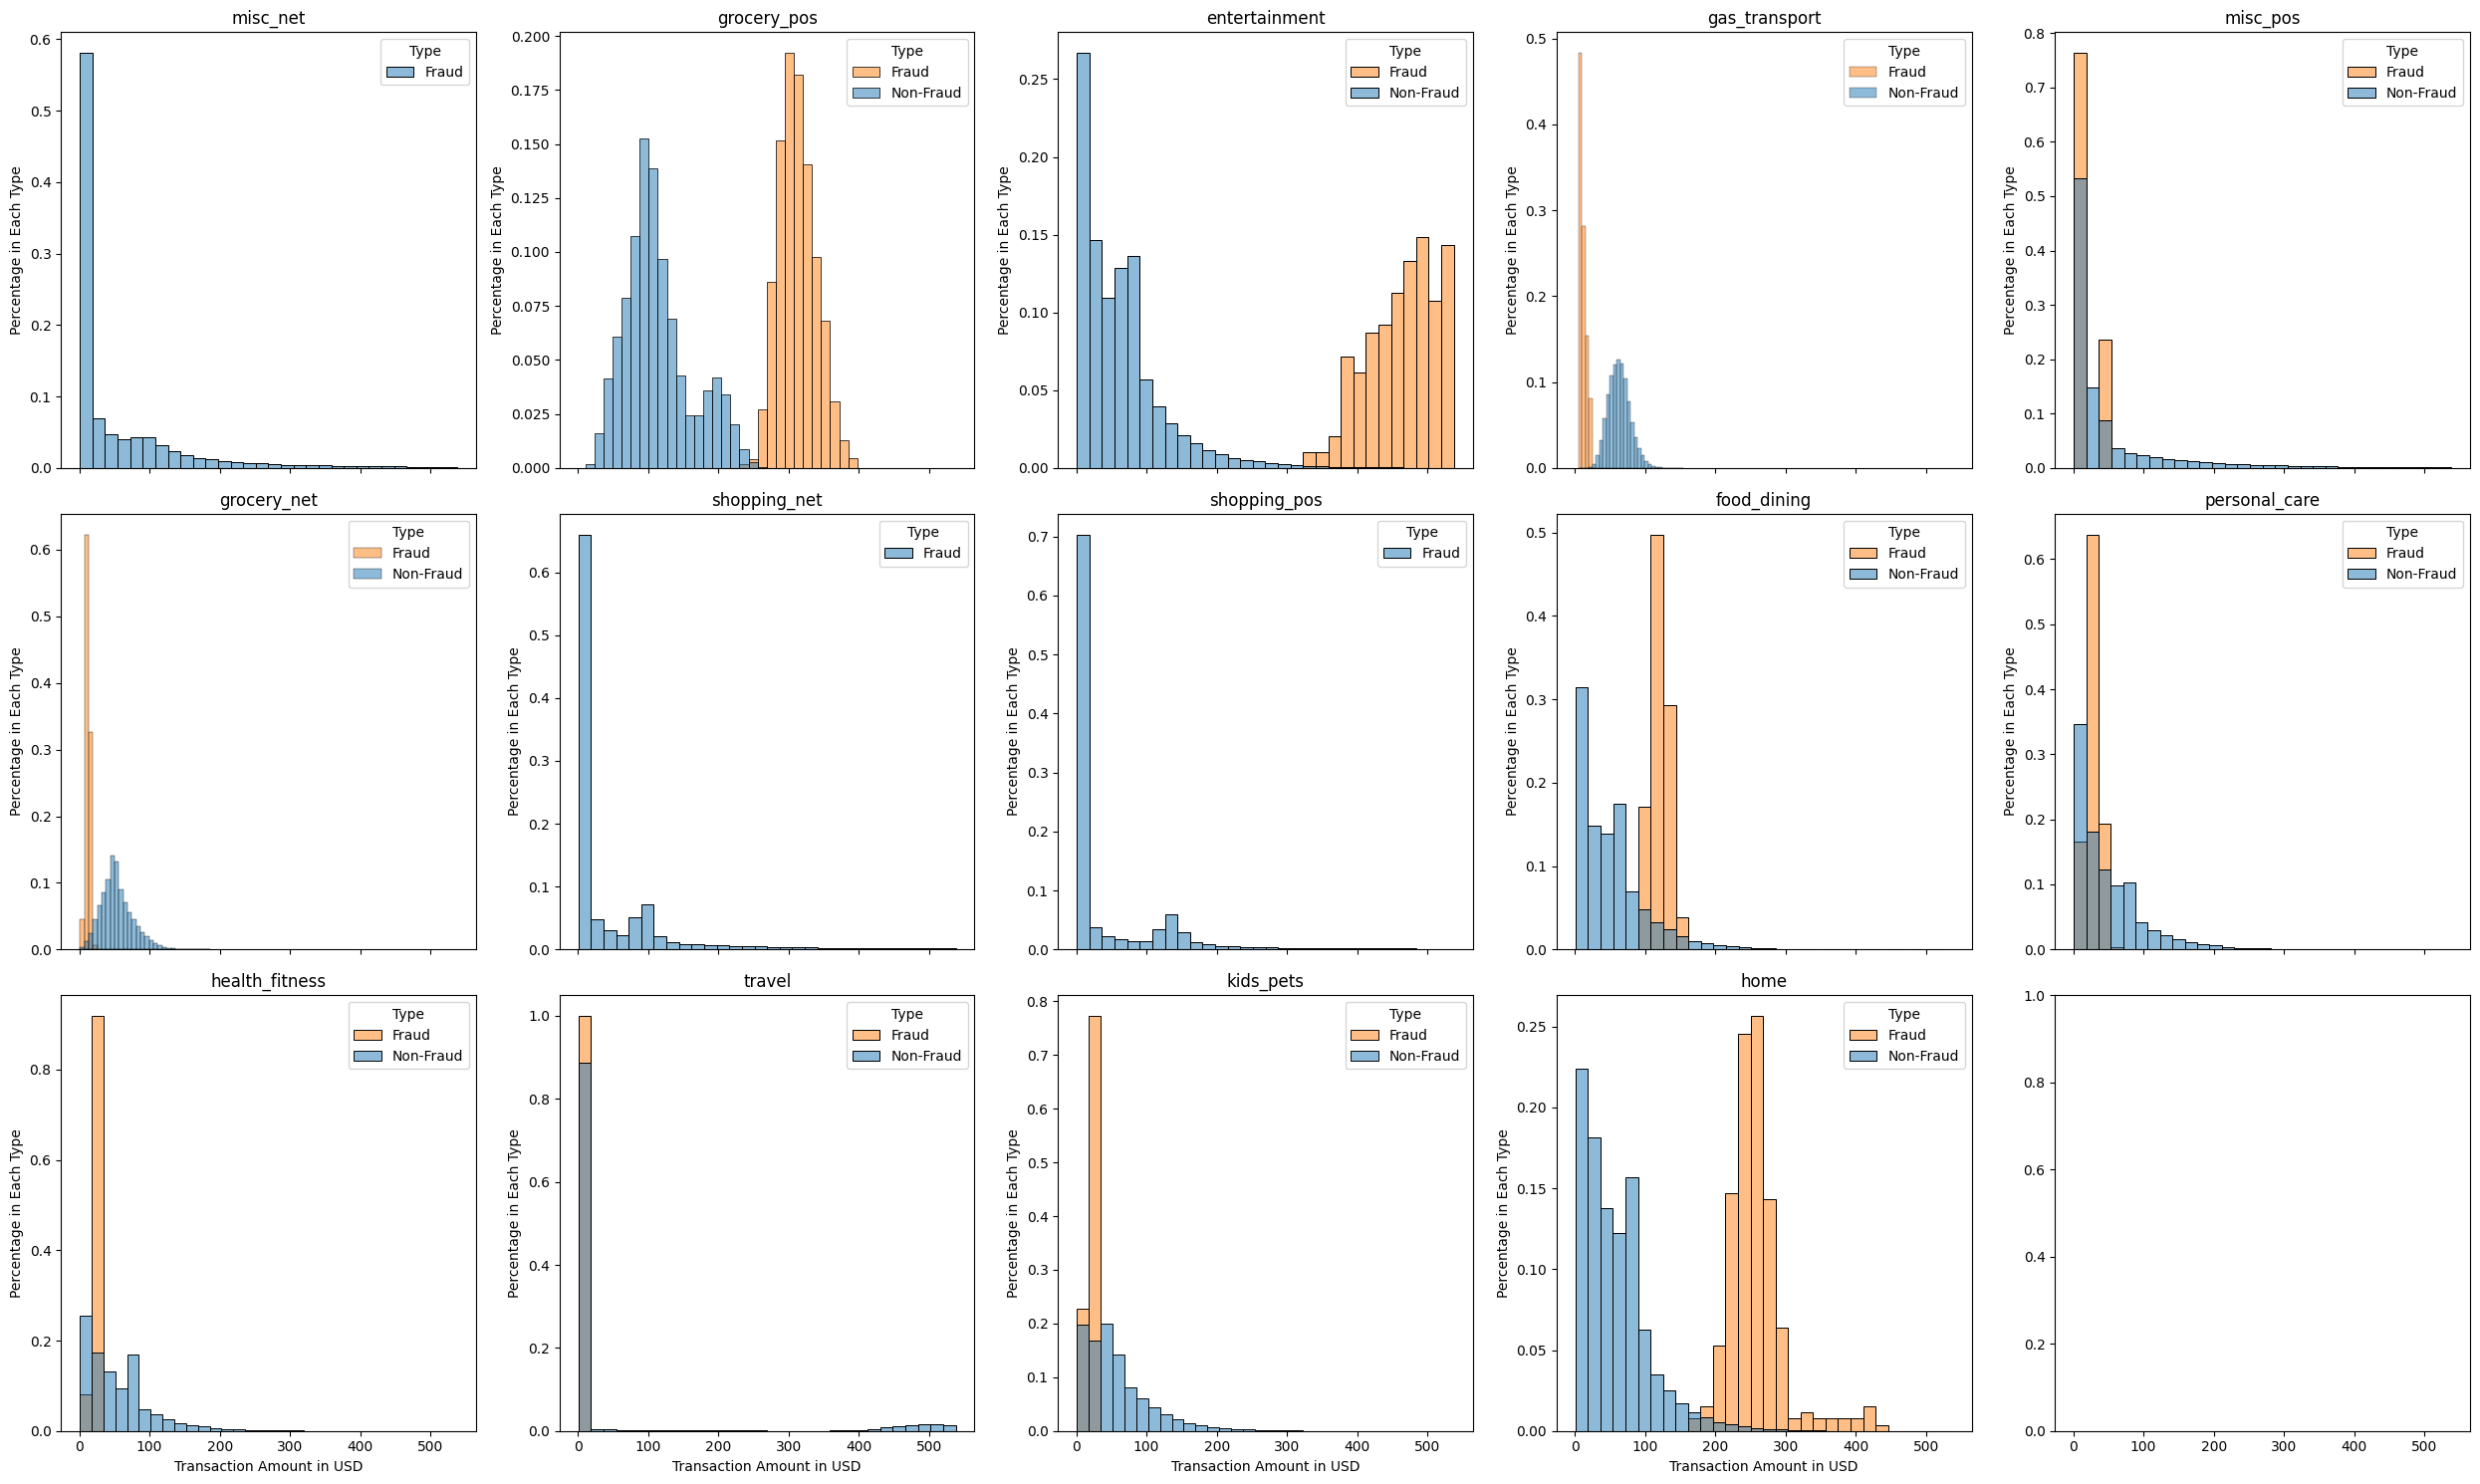

In [98]:
p99 = data["amt"].quantile(0.99)
categories = data['category'].unique()

num_plots = len(categories)
num_rows = math.isqrt(num_plots)
num_cols = math.ceil(num_plots / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(
    5*num_cols, 5*num_rows), sharex=True)

for i, category in enumerate(categories):

    row = i // num_cols
    col = i % num_cols

    data_category = data[data['category'] == category]

    if num_rows == 1 and num_cols == 1:
        ax = axes
    elif num_rows == 1 or num_cols == 1:
        ax = axes[i]
    else:
        ax = axes[row, col]

    sns.histplot(x='amt', data=data_category[data_category['amt'] <= p99],
                 hue='is_fraud', stat='probability',
                 common_norm=False, bins=30, ax=ax)

    ax.set_ylabel('Percentage in Each Type')
    ax.set_xlabel('Transaction Amount in USD')
    ax.set_title(f'{category}')
    ax.legend(title='Type', labels=['Fraud', 'Non-Fraud'])

plt.tight_layout()

plt.show();

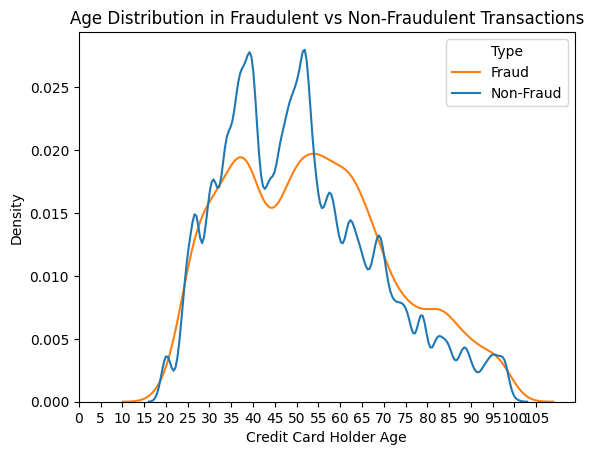

In [99]:
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = pd.Timestamp.now().year - data['dob'].dt.year
ax=sns.kdeplot(x='age',data=data, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Non-Fraud'])

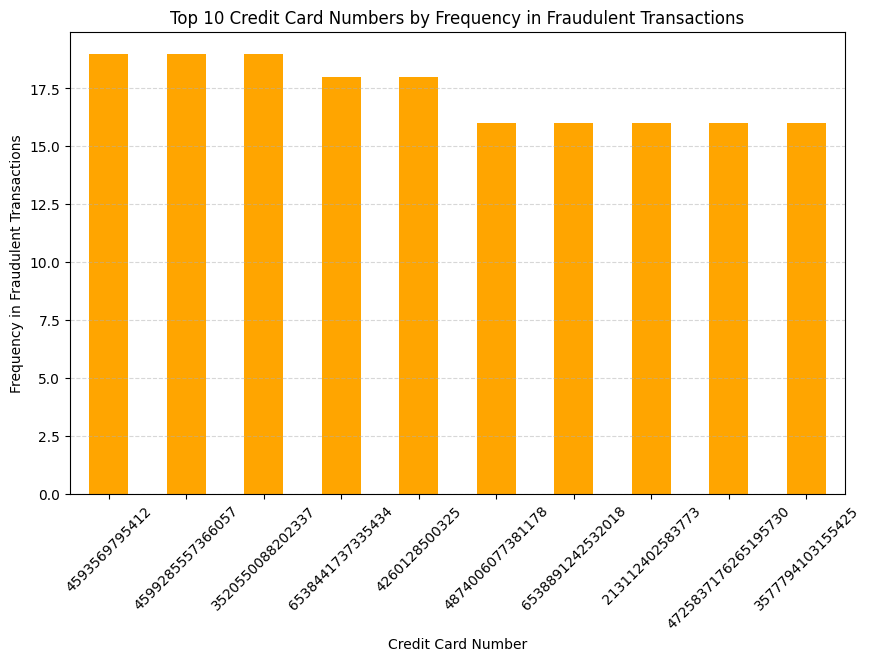

In [100]:
# Count the frequency of each cc_num in fraudulent transactions
cc_num_frequency = fraudulent_transactions['cc_num'].value_counts()

# Select top 10 most frequent cc_num values in fraud cases
top_cc_num_frequency = cc_num_frequency.head(10)

# Plot the frequency of top 10 cc_num values in fraud cases
plt.figure(figsize=(10, 6))
top_cc_num_frequency.plot(kind='bar', color='orange')
plt.xlabel('Credit Card Number')
plt.ylabel('Frequency in Fraudulent Transactions')
plt.title('Top 10 Credit Card Numbers by Frequency in Fraudulent Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Data Preprocessing


In [101]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'trans_date_trans_time', 'cc_num',
       'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'hour',
       'day', 'month', 'weekday', 'age'],
      dtype='object')

In [102]:
# Take only necessary columns
data = data[['cc_num', 'merchant', 'category', 'amt', 'gender', 'zip', 'lat', 'long',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'day', 'month',
       'weekday', 'age']]

In [103]:
data.head()

,cc_num,merchant,category,amt,gender,zip,lat,long,merch_lat,merch_long,is_fraud,hour,day,month,weekday,age
0,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,36.011293,-82.048315,0,0,1,1,1,36
1,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,49.159047,-118.186462,0,0,1,1,1,46
2,38859492057661,Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,43.150704,-112.154481,0,0,1,1,1,62
3,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,47.034331,-112.561071,0,0,1,1,1,57
4,375534208663984,Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,38.674999,-78.632459,0,0,1,1,1,38


In [104]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['merchant'] = label_encoder.fit_transform(data['merchant'])
data['category'] = label_encoder.fit_transform(data['category'])
data['gender'] = label_encoder.fit_transform(data['gender'])

In [105]:
# Extract features and target variable from the DataFrame
X = data.drop(['is_fraud'], axis=1)
y = data['is_fraud']

# Data split

In [106]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.25, random_state=42
)

# Data scaling

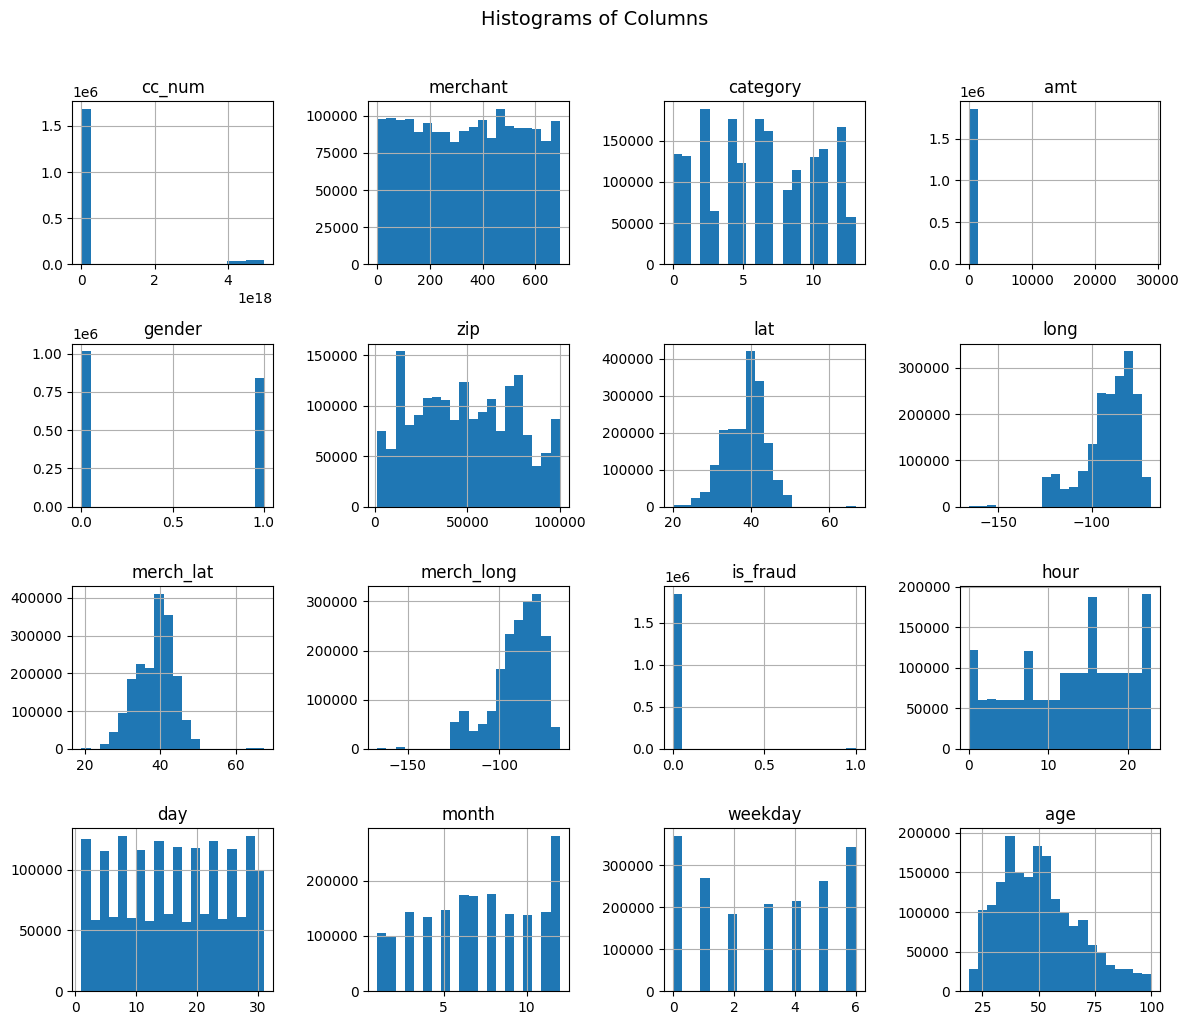

In [107]:
# Plot all the data
data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Columns', x=0.5, y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

In [108]:
# Data scaling
columns_to_scale = ['cc_num', 'amt', 'zip', 'lat', 'long', 'merch_lat', 'merch_long']

# # Initialize StandardScaler
scaler = StandardScaler()

subset = data[columns_to_scale]

# Data scaling
scaled = scaler.fit_transform(subset)

data[columns_to_scale] = scaled

# Model Training & Testing

In [109]:
# RandomForestClassifier
class_weights = { 0:12, 1:1, 2:13, 3:14, 4:1, 5:10, 6:1, 7:1, 8:1, 9:1, 10:11, 11:1, 12:1, 13:1}
rfc = RandomForestClassifier(class_weight=class_weights)
rfc.fit(X_train, y_train)

# Predictions
rfc_y_pred = rfc.predict(X_test)

In [110]:
# Evalution results
print('Random Forest report:\n', classification_report(y_test, rfc_y_pred))

Random Forest report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    460640
           1       0.97      0.73      0.84      2459

    accuracy                           1.00    463099
   macro avg       0.98      0.87      0.92    463099
weighted avg       1.00      1.00      1.00    463099



In [111]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions
knn_y_pred = knn.predict(X_test)

In [112]:
# Evalution results
print('KNN Classification report:\n', classification_report(y_test, knn_y_pred))

KNN Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    460640
           1       0.64      0.24      0.35      2459

    accuracy                           1.00    463099
   macro avg       0.82      0.62      0.67    463099
weighted avg       0.99      1.00      0.99    463099



In [113]:
# Define XGBoost classifier
xgb = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predictions
xgb_y_pred = xgb.predict(X_test)

In [114]:
print('XGBoost Classification report:\n', classification_report(y_test, xgb_y_pred))

XGBoost Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    460640
           1       0.96      0.83      0.89      2459

    accuracy                           1.00    463099
   macro avg       0.98      0.92      0.95    463099
weighted avg       1.00      1.00      1.00    463099



In [115]:
# Define model names and predictions
models = ['Random Forest', 'XGBoost', 'KNeighbors Classifier']
y_preds = [rfc_y_pred, xgb_y_pred, knn_y_pred]
y_true = y_test

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
conf_matrices = []

# Compute evaluation metrics for each model
for y_pred in y_preds:
    accuracy_scores.append(accuracy_score(y_true, y_pred))
    precision_scores.append(precision_score(y_true, y_pred))
    recall_scores.append(recall_score(y_true, y_pred))
    f1_scores.append(f1_score(y_true, y_pred))
    auc_scores.append(f1_score(y_true, y_pred))
    conf_matrices.append(confusion_matrix(y_true, y_pred))

# Model Comparison

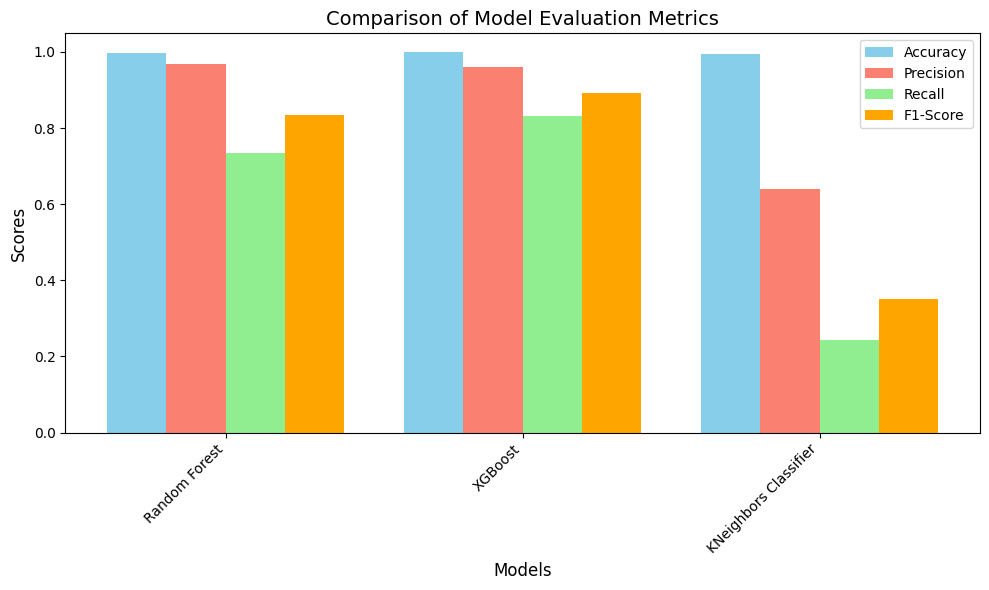

In [116]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.2
index = np.arange(len(models))

# Plot bars for each evaluation metric
accuracy_bars = ax.bar(index - 1.5 * bar_width, accuracy_scores, bar_width, label='Accuracy', color='skyblue')
precision_bars = ax.bar(index - 0.5 * bar_width, precision_scores, bar_width, label='Precision', color='salmon')
recall_bars = ax.bar(index + 0.5 * bar_width, recall_scores, bar_width, label='Recall', color='lightgreen')
f1_bars = ax.bar(index + 1.5 * bar_width, f1_scores, bar_width, label='F1-Score', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Model Evaluation Metrics', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

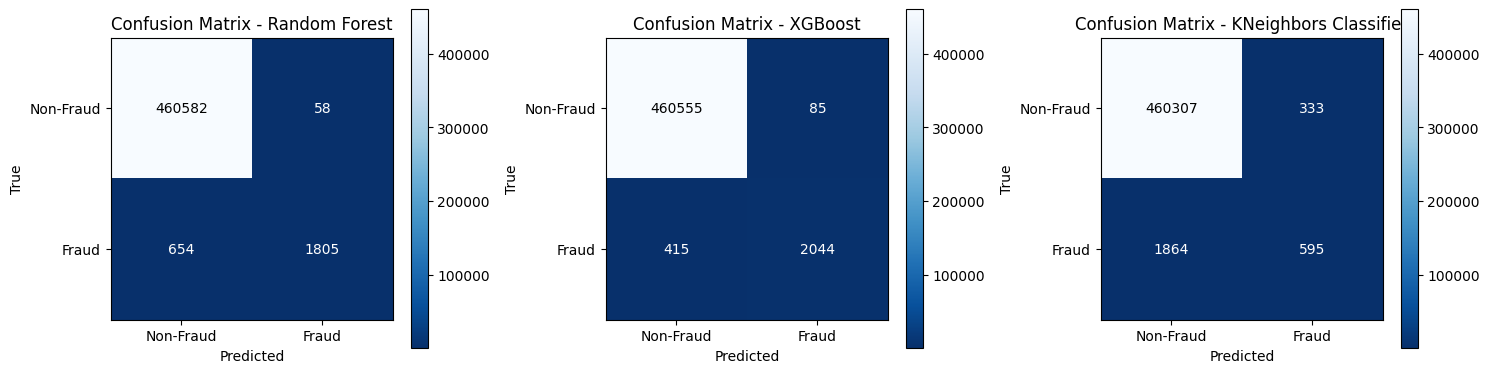

In [117]:
# Plot confusion matrix heatmaps for each model
plt.figure(figsize=(15, 4))
for i, (model, conf_matrix) in enumerate(zip(models, conf_matrices), 1):
    plt.subplot(1, 3, i)
    plt.imshow(conf_matrix, cmap='Blues_r', interpolation='nearest')
    plt.title(f'Confusion Matrix - {model}')
    plt.colorbar()
    tick_marks = np.arange(len(conf_matrix))
    plt.xticks(tick_marks, ['Non-Fraud', 'Fraud'])
    plt.yticks(tick_marks, ['Non-Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('True')

    for i, j in np.ndindex(conf_matrix.shape):
        plt.text(j, i, f'{conf_matrix[i, j]}', ha='center', va='center', color='black' if conf_matrix[i, j] > np.max(conf_matrix) / 2 else 'white')


plt.tight_layout()
plt.show()

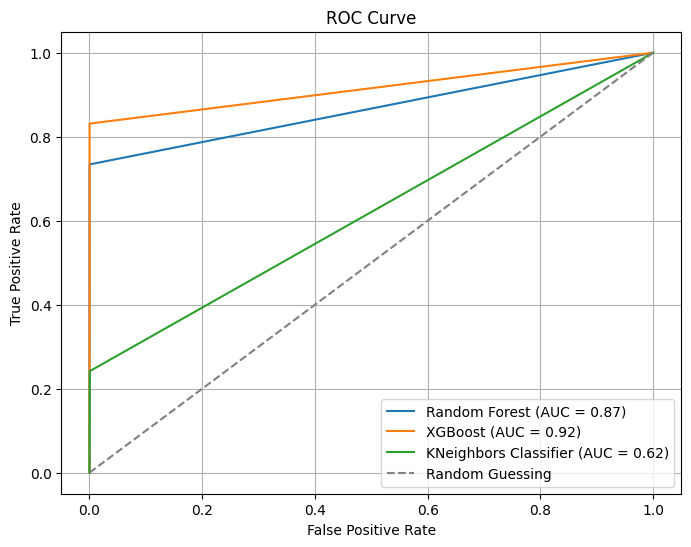

In [118]:
# Initialize lists to store ROC curve data
roc_auc = []

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))

for idx, y_pred in enumerate(y_preds):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc.append(auc(fpr, tpr))

    plt.plot(fpr, tpr, label=f'{models[idx]} (AUC = {roc_auc[idx]:.2f})')

# Plot the random guessing line (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()